In [1]:
import numpy as np
import pandas as pd

from EDA_utils import *

In [2]:
df_ori = pd.read_csv('LLCP2018.csv.gz')
df = df_ori.copy()

## Clean a Continuous Variable - BLDSUGAR

First, check boxplot and distribution plot before cleaning. From the distribution, you can see peaks around 100, 200, 300, and 400. Read codebook you will find they represents results with different units.
The peaks at the very end is the 777/888/999 values that gives not valid results.

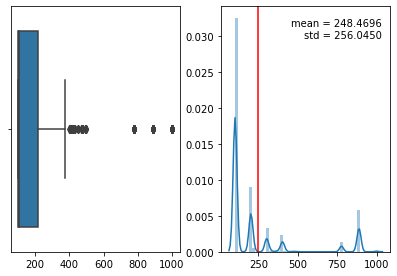

In [3]:
fig_before = ColumnVisualizer(df['BLDSUGAR']).get_figure()

You can indicate 'Continuous' or 'Categorical' in `ColumnVisualizer` using `col_type` argument. It can be infered, but might require manually input if automatically infer fails.

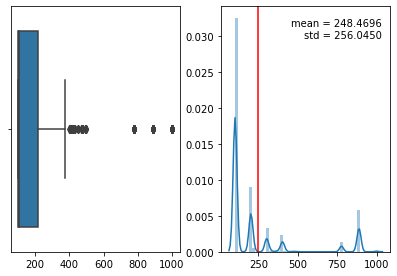

In [4]:
fig_before = ColumnVisualizer(df['BLDSUGAR'], col_type='Continuous').get_figure()

Do the data cleaning, converting results in different units to the same unit. I will use times per day here. Also values 777/888/999 will be converted to null values (np.nan). Put a description comment for each steps of cleaning. The cleaning steps will be executed in order.

For each cleaning step, there are three parts in each tuple:
1. condition: A lambda function used to select entries in column.
2. action: A lambda function used to do transformations on selected values.
3. descrption: text to describe the cleaning step.

```
col[condition] = action(col[condition])
```

In [5]:
cleaning_steps = [
    (
        lambda x: (x > 100) & (x < 200),
        lambda x: (x - 100), 
        '1XX means XX times per day. -> x - 100'
    ),
    (
        lambda x: (x > 200) & (x < 300),
        lambda x: (x - 200) / 7,
        '2XX means XX times per week, convert to per day. -> (x - 200) / 7'

    ),
    (
        lambda x: (x > 300) & (x < 400),
        lambda x: (x - 300) / 30, 
        '3XX means XX times per month, convert to per day. -> (x - 300) / 30'
    ),
    (
        lambda x: (x > 400) & (x < 500), 
        lambda x: (x - 400) / 365, 
        '4XX means XX times per year, convert to per day. -> (x - 400) / 365'
    ),
    (
        lambda x: x == 777,
        lambda x: np.nan,
        '777 Dont know / Not sure -> NA'
    ),
    (
        lambda x: x == 888,
        lambda x: 0,
        '888 Never -> 0'
    ),
    (
        lambda x: x == 999,
        lambda x: np.nan,
        '999 Refused -> NA'
    ),
]
cleaner = ColumnCleaner(df['BLDSUGAR'], cleaning_steps)
df['BLDSUGAR'] = cleaner.get_cleaned_column()
print(cleaner.get_clean_report())

Cleaning Steps:
1. 1XX means XX times per day. -> x - 100
2. 2XX means XX times per week, convert to per day. -> (x - 200) / 7
3. 3XX means XX times per month, convert to per day. -> (x - 300) / 30
4. 4XX means XX times per year, convert to per day. -> (x - 400) / 365
5. 777 Dont know / Not sure -> NA
6. 888 Never -> 0
7. 999 Refused -> NA


Check the figure after cleaning. Red line is the mean and the dashed line is mean + 3 * std.

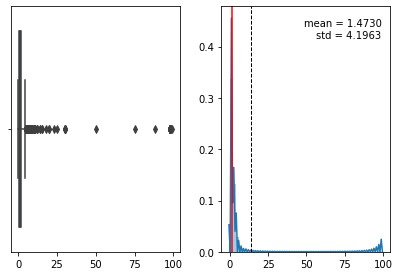

In [6]:
fig_after = ColumnVisualizer(df['BLDSUGAR']).get_figure()

It is also important to see the percentage of missing values after cleaning.

In [7]:
missing_count = df['BLDSUGAR'].isna().sum()
missing_report = 'There are {:d} ({:.2f}%) missing records after cleaning.'.format(
    missing_count, missing_count / len(df) * 100
)
missing_report

'There are 420068 (96.03%) missing records after cleaning.'

Build a PDF report for cleaning.

In [8]:
# [(figure, size), text]
ReportBuilder(
    [(fig_before, (8, 3)), cleaner.get_clean_report(), missing_report, (fig_after, (8, 3))],
    title='BLDSUGAR', filename='BLDSUGAR.pdf'
).build_report()

I also make a function `clean_and_report` on utils, which you can use directly. It **returns a DataFrame with cleaned column** and save the PDF report.

Cleaning Steps:
1. 1XX means XX times per day. -> x - 100
2. 2XX means XX times per week, convert to per day. -> (x - 200) / 7
3. 3XX means XX times per month, convert to per day. -> (x - 300) / 30
4. 4XX means XX times per year, convert to per day. -> (x - 400) / 365
5. 777 Dont know / Not sure -> NA
6. 888 Never -> 0
7. 999 Refused -> NA
There are 420068 (96.03%) missing records.


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_MAM5022,_RFPAP34,_RFPSA22,_RFBLDS3,_COL10YR,_HFOB3YR,_FS5YR,_FOBTFS,_CRCREC,_AIDTST3
0,1.0,1.0,b'01052018',b'01',b'05',b'2018',1100.0,b'2018000001',2.018000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,1.0,1.0,b'01122018',b'01',b'12',b'2018',1100.0,b'2018000002',2.018000e+09,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1.0,1.0,b'01082018',b'01',b'08',b'2018',1100.0,b'2018000003',2.018000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1.0,1.0,b'01032018',b'01',b'03',b'2018',1100.0,b'2018000004',2.018000e+09,1.0,...,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,1.0,1.0,b'01122018',b'01',b'12',b'2018',1100.0,b'2018000005',2.018000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437431,72.0,12.0,b'03192019',b'03',b'19',b'2019',1100.0,b'2018004844',2.018005e+09,NaN,...,1.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0
437432,72.0,12.0,b'03142019',b'03',b'14',b'2019',1100.0,b'2018004845',2.018005e+09,NaN,...,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0
437433,72.0,12.0,b'03092019',b'03',b'09',b'2019',1100.0,b'2018004846',2.018005e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
437434,72.0,12.0,b'03222019',b'03',b'22',b'2019',1100.0,b'2018004847',2.018005e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


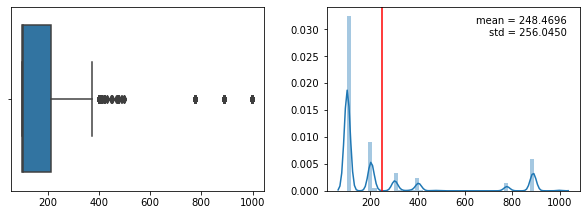

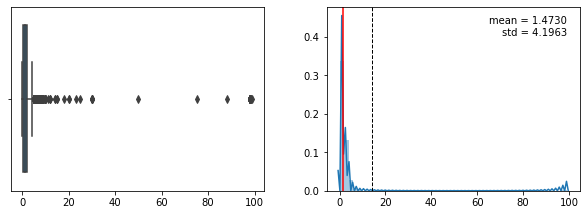

In [9]:
clean_steps_BLDSUGAR = [
    (
        lambda x: (x > 100) & (x < 200),
        lambda x: (x - 100), 
        '1XX means XX times per day. -> x - 100'
    ),
    (
        lambda x: (x > 200) & (x < 300),
        lambda x: (x - 200) / 7,
        '2XX means XX times per week, convert to per day. -> (x - 200) / 7'

    ),
    (
        lambda x: (x > 300) & (x < 400),
        lambda x: (x - 300) / 30, 
        '3XX means XX times per month, convert to per day. -> (x - 300) / 30'
    ),
    (
        lambda x: (x > 400) & (x < 500), 
        lambda x: (x - 400) / 365, 
        '4XX means XX times per year, convert to per day. -> (x - 400) / 365'
    ),
    (
        lambda x: x == 777,
        lambda x: np.nan,
        '777 Dont know / Not sure -> NA'
    ),
    (
        lambda x: x == 888,
        lambda x: 0,
        '888 Never -> 0'
    ),
    (
        lambda x: x == 999,
        lambda x: np.nan,
        '999 Refused -> NA'
    ),
]
clean_and_report(
    df_ori, 'BLDSUGAR', clean_steps_BLDSUGAR, # (optional) col_type='Continuous'
)

## Clean a Categorical Variable - USEMRJN2

Cleaning Steps:
1. 7 Dont know / Not sure -> NA
2. 9 Refused -> NA
There are 429624 (98.21%) missing records.


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_MAM5022,_RFPAP34,_RFPSA22,_RFBLDS3,_COL10YR,_HFOB3YR,_FS5YR,_FOBTFS,_CRCREC,_AIDTST3
0,1.0,1.0,b'01052018',b'01',b'05',b'2018',1100.0,b'2018000001',2.018000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,1.0,1.0,b'01122018',b'01',b'12',b'2018',1100.0,b'2018000002',2.018000e+09,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1.0,1.0,b'01082018',b'01',b'08',b'2018',1100.0,b'2018000003',2.018000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1.0,1.0,b'01032018',b'01',b'03',b'2018',1100.0,b'2018000004',2.018000e+09,1.0,...,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,1.0,1.0,b'01122018',b'01',b'12',b'2018',1100.0,b'2018000005',2.018000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437431,72.0,12.0,b'03192019',b'03',b'19',b'2019',1100.0,b'2018004844',2.018005e+09,NaN,...,1.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0
437432,72.0,12.0,b'03142019',b'03',b'14',b'2019',1100.0,b'2018004845',2.018005e+09,NaN,...,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0
437433,72.0,12.0,b'03092019',b'03',b'09',b'2019',1100.0,b'2018004846',2.018005e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
437434,72.0,12.0,b'03222019',b'03',b'22',b'2019',1100.0,b'2018004847',2.018005e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


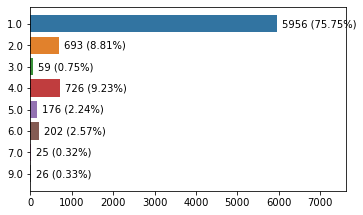

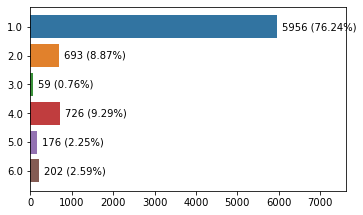

In [10]:
clean_steps_USEMRJN2 = [
    (lambda x: x == 7, lambda x: np.nan, '7 Dont know / Not sure -> NA'),
    (lambda x: x == 9, lambda x: np.nan, '9 Refused -> NA'),
]
clean_and_report(
    df_ori, 'USEMRJN2', clean_steps_USEMRJN2, # (optional) col_type='Categorical'
)

## Column does not need to be clean - _STATE

We might still want to see the EDA plots for these variables. Just put empty clean steps in the function.

Also, `col_type='Categorical'` is a must in this one, because it will be infered as a continuous variable (too many unique values).

To give the figure a nice size, also manually input the `fig_size`.

There are 0 (0.00%) missing records.


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_MAM5022,_RFPAP34,_RFPSA22,_RFBLDS3,_COL10YR,_HFOB3YR,_FS5YR,_FOBTFS,_CRCREC,_AIDTST3
0,1.0,1.0,b'01052018',b'01',b'05',b'2018',1100.0,b'2018000001',2.018000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,1.0,1.0,b'01122018',b'01',b'12',b'2018',1100.0,b'2018000002',2.018000e+09,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1.0,1.0,b'01082018',b'01',b'08',b'2018',1100.0,b'2018000003',2.018000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1.0,1.0,b'01032018',b'01',b'03',b'2018',1100.0,b'2018000004',2.018000e+09,1.0,...,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,1.0,1.0,b'01122018',b'01',b'12',b'2018',1100.0,b'2018000005',2.018000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437431,72.0,12.0,b'03192019',b'03',b'19',b'2019',1100.0,b'2018004844',2.018005e+09,NaN,...,1.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0
437432,72.0,12.0,b'03142019',b'03',b'14',b'2019',1100.0,b'2018004845',2.018005e+09,NaN,...,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0
437433,72.0,12.0,b'03092019',b'03',b'09',b'2019',1100.0,b'2018004846',2.018005e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
437434,72.0,12.0,b'03222019',b'03',b'22',b'2019',1100.0,b'2018004847',2.018005e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


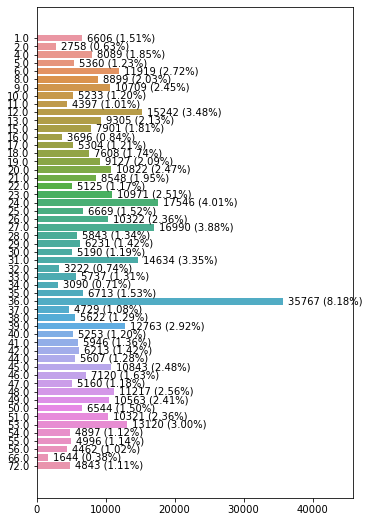

In [11]:
clean_and_report(
    df_ori, '_STATE', [], col_type='Categorical', fig_size=(5, 8)
)